In [1]:
import pandas as pd
import numpy as np
import io
import dvc.api
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

In [3]:
from plots import Plots as plot

In [4]:
df_train = pd.read_csv('../data/df_train.csv')
df_test = pd.read_csv('../data/df_test.csv')

## Train Data Exploration

In [5]:
df_train.head()

,Id,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
1,1115,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
2,2230,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
3,3345,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
4,4460,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"


In [6]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
1,857,1,3,2015-09-16,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
2,1713,1,2,2015-09-15,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
3,2569,1,1,2015-09-14,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"
4,3425,1,7,2015-09-13,0.0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0"


In [7]:
# unique features in train that are not in test column
set(df_train.columns) - set(df_test.columns)

{'Customers', 'Sales'}

#### Data Distribution between train and test

In [8]:
df_train.describe()

,Id,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.086040e+05,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430020e+03,5.244756e+00,1.974140e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,2.936431e+05,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.705298e+03,3.928522e+00,5.085323e+01,4.999999e-01,1.532393e+01,1.005877e+03
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.543020e+05,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.086040e+05,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,7.629060e+05,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.017208e+06,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [9]:
df_test.describe()

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5089.322199,4.800234,1968.408879,0.580607,14.182243,1168.078271
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7217.057494,3.835877,52.744832,0.493466,16.177932,992.765386
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,1.000000,1900.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2450.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6435.000000,9.000000,2011.000000,1.000000,31.000000,2012.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Id                         1017209 non-null  int64  
 1   Store                      1017209 non-null  int64  
 2   DayOfWeek                  1017209 non-null  int64  
 3   Date                       1017209 non-null  object 
 4   Sales                      1017209 non-null  int64  
 5   Customers                  1017209 non-null  int64  
 6   Open                       1017209 non-null  int64  
 7   Promo                      1017209 non-null  int64  
 8   StateHoliday               1017209 non-null  object 
 9   SchoolHoliday              1017209 non-null  int64  
 10  StoreType                  1017209 non-null  object 
 11  Assortment                 1017209 non-null  object 
 12  CompetitionDistance        1017209 non-null  float64
 13  CompetitionO

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         41088 non-null  int64  
 1   Store                      41088 non-null  int64  
 2   DayOfWeek                  41088 non-null  int64  
 3   Date                       41088 non-null  object 
 4   Open                       41077 non-null  float64
 5   Promo                      41088 non-null  int64  
 6   StateHoliday               41088 non-null  object 
 7   SchoolHoliday              41088 non-null  int64  
 8   StoreType                  41088 non-null  object 
 9   Assortment                 41088 non-null  object 
 10  CompetitionDistance        41088 non-null  float64
 11  CompetitionOpenSinceMonth  41088 non-null  float64
 12  CompetitionOpenSinceYear   41088 non-null  float64
 13  Promo2                     41088 non-null  int

In [12]:
df_train.nunique()

Id                           1017209
Store                           1115
DayOfWeek                          7
Date                             942
Sales                          21734
Customers                       4086
Open                               2
Promo                              2
StateHoliday                       4
SchoolHoliday                      2
StoreType                          4
Assortment                         3
CompetitionDistance              655
CompetitionOpenSinceMonth         12
CompetitionOpenSinceYear          23
Promo2                             2
Promo2SinceWeek                   25
Promo2SinceYear                    8
PromoInterval                      4
dtype: int64

#### Distribution of the features in train and test samples

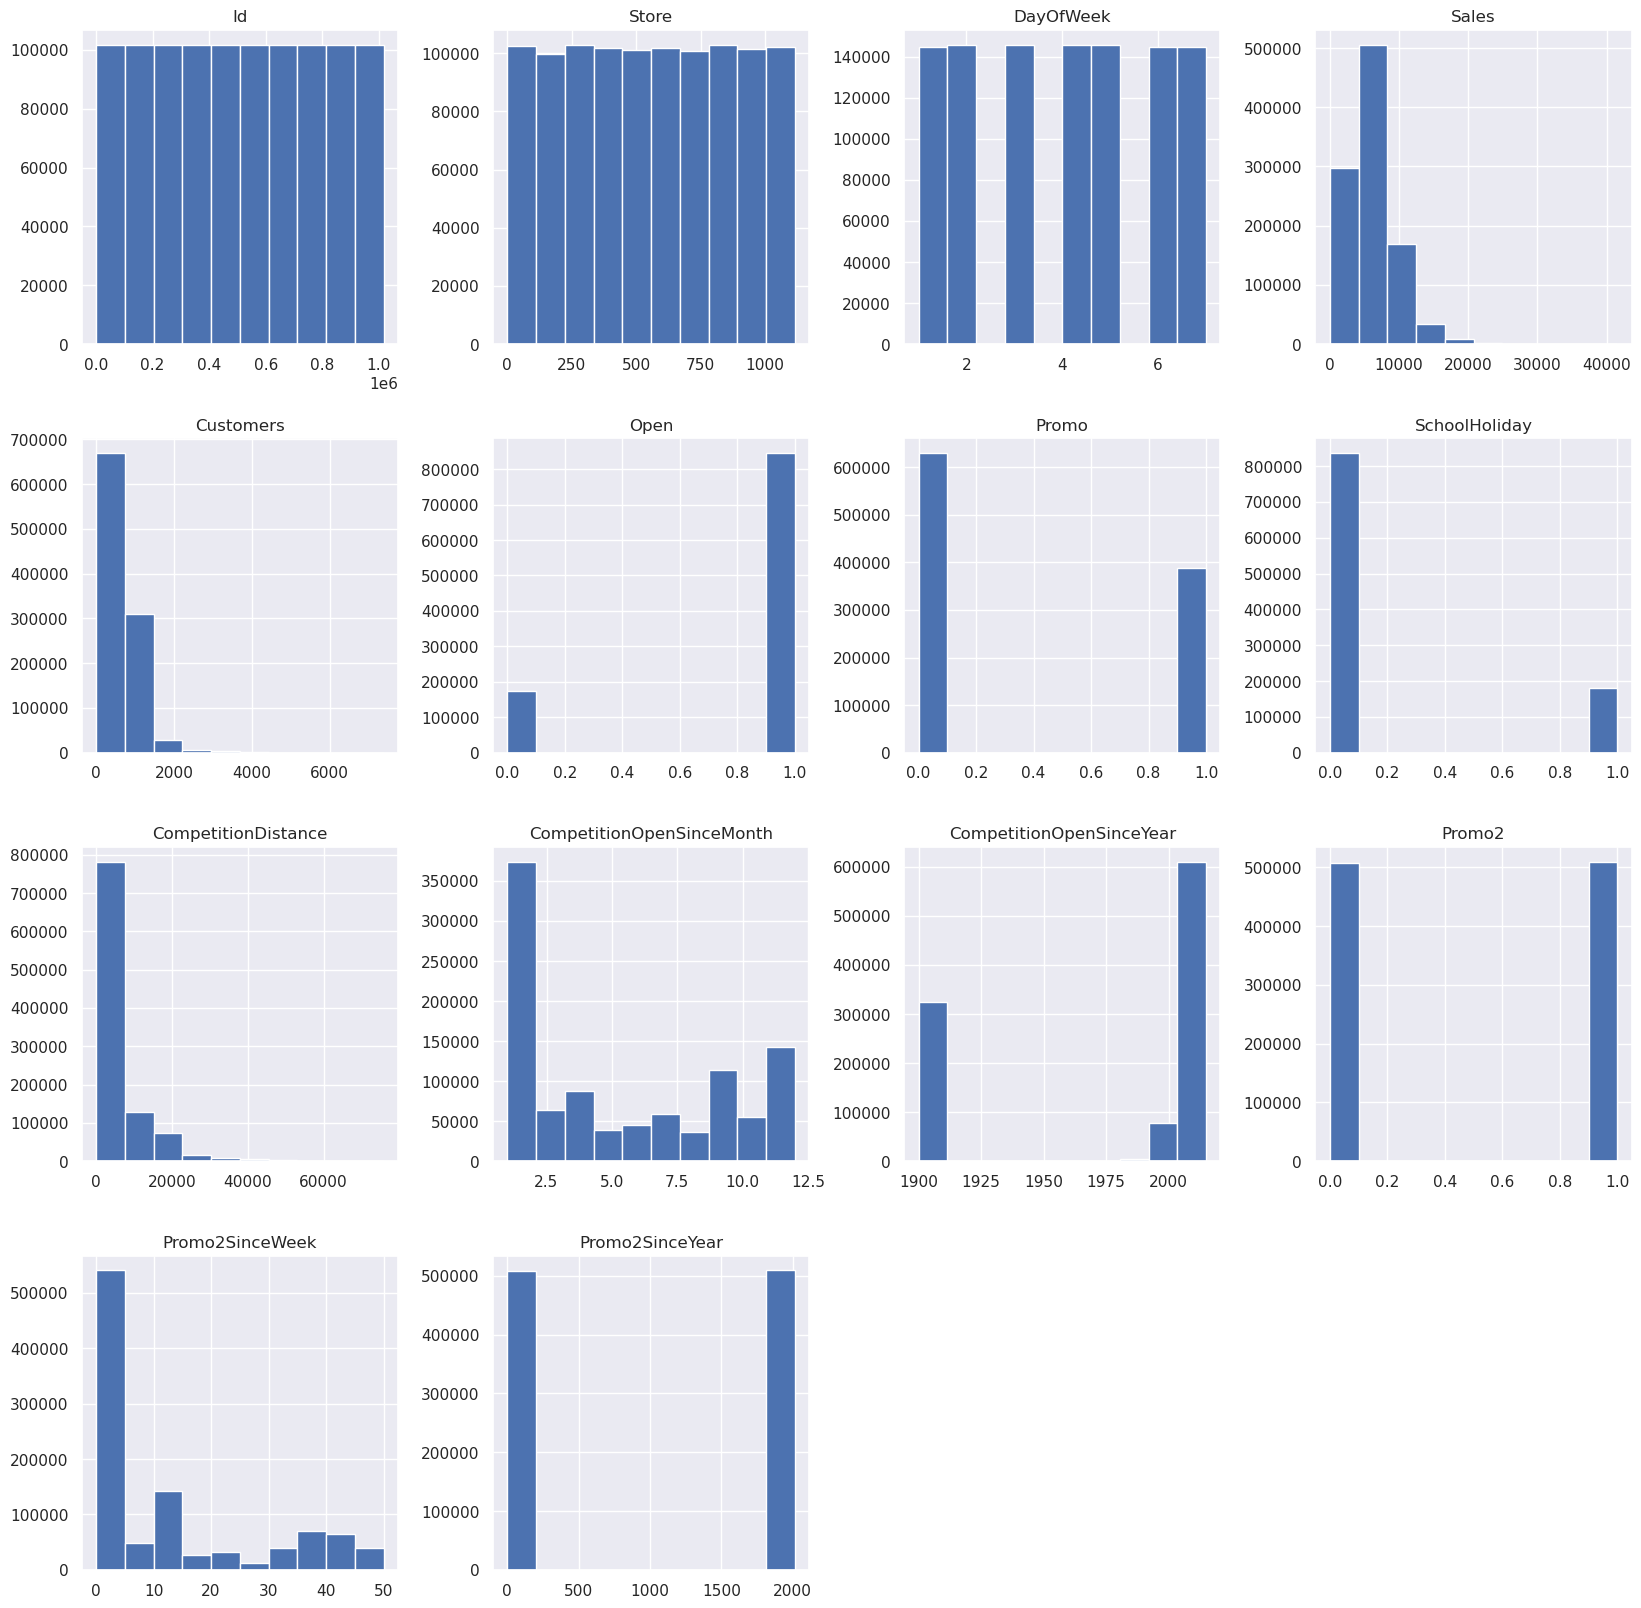

In [13]:
plot.plot_hist_all(df=df_train)

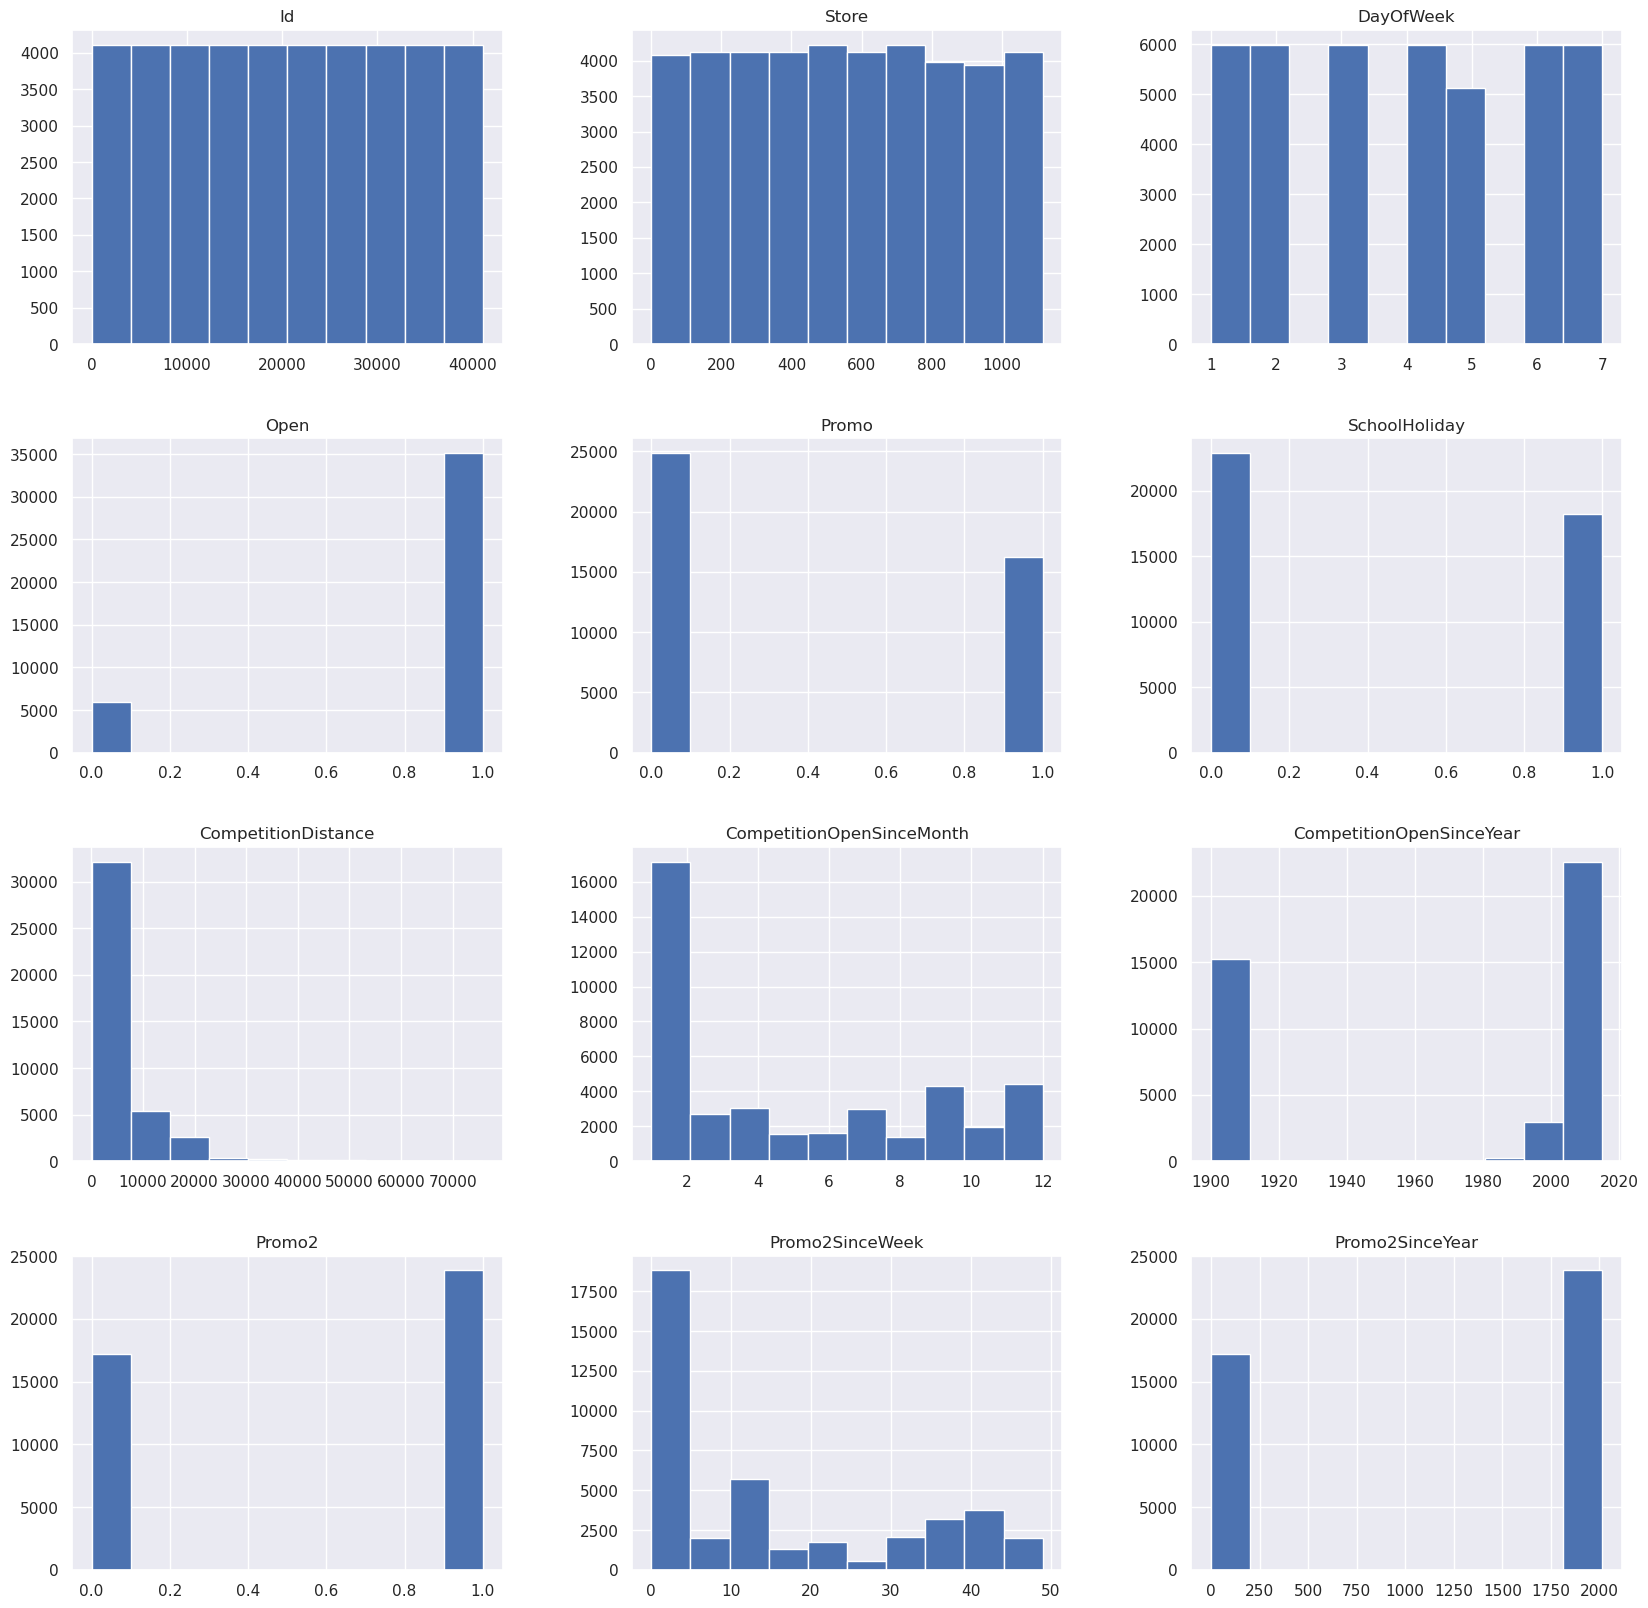

In [14]:
plot.plot_hist_all(df=df_test)

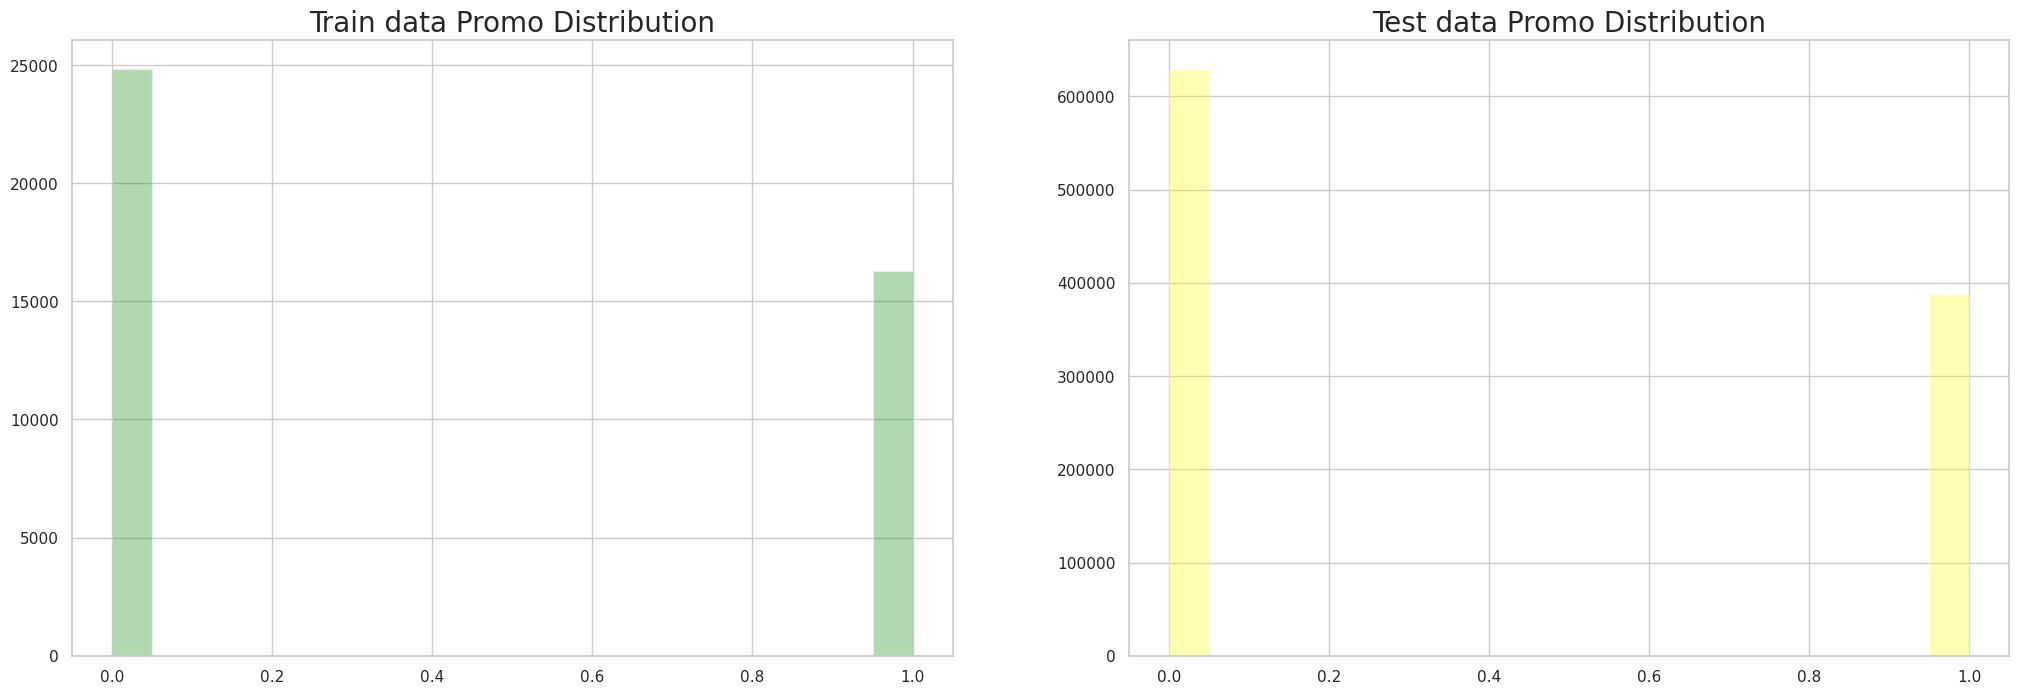

In [15]:
plot.plot_subplots(df_test['Promo'], df_train['Promo'], 'Train data Promo Distribution', 'Test data Promo Distribution')

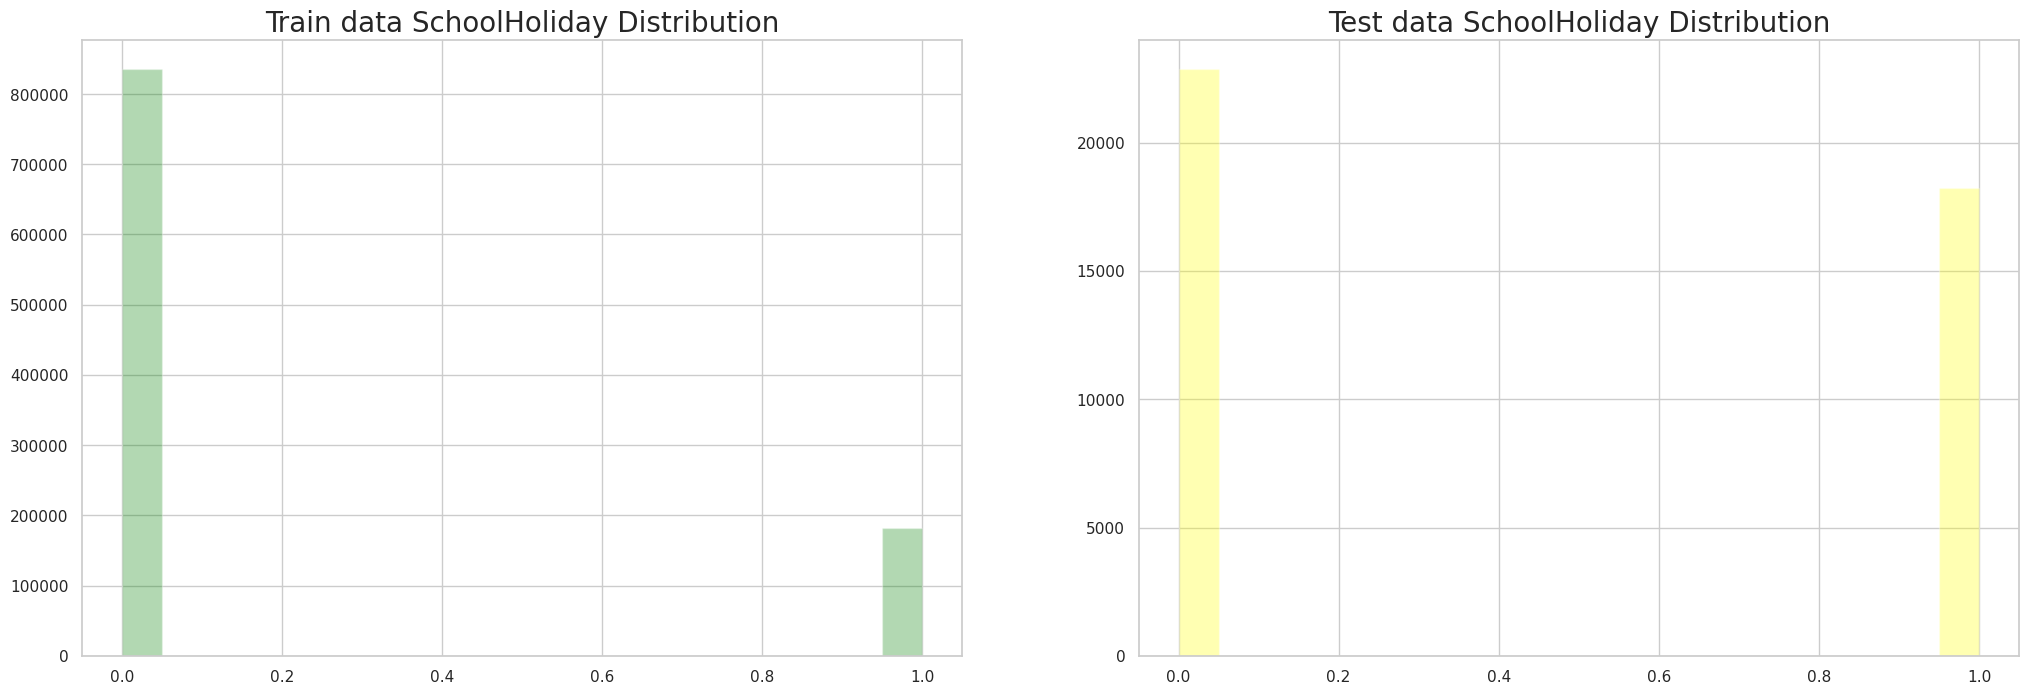

In [16]:
plot.plot_subplots(df_train['SchoolHoliday'], df_test['SchoolHoliday'], 'Train data SchoolHoliday Distribution', 'Test data SchoolHoliday Distribution')

In [17]:
def plot_comparison(df,x,y):
    res = df.groupby(x)[y].sum()
    res = pd.DataFrame(columns = ['Sum',x], data = np.transpose([res.values,res.index]))
    plot.plot_bar(df=res,x_col=x,y_col='Sum',title='Total '+y+ ' per '+ x,xlabel=x,ylabel='Sum of ' + y )
    

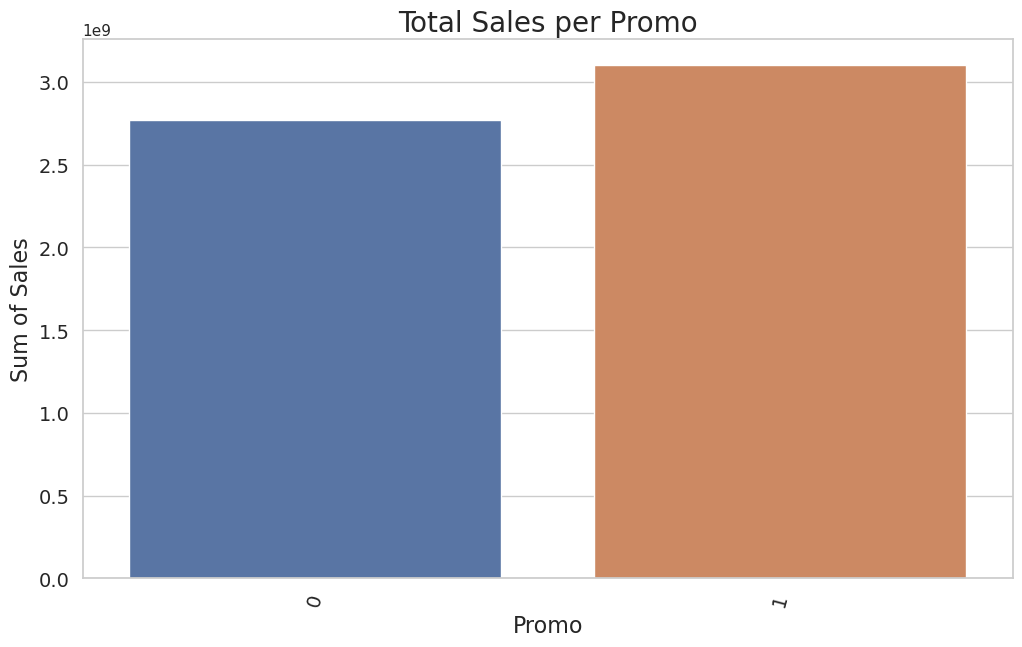

In [18]:
# Distribution of promotion per Sales
plot_comparison(df_train,'Promo','Sales')

In [20]:
df_store_sales = df_train.groupby('Store')['Sales'].sum().reset_index()

In [21]:
df_store_sales

,Store,Sales
0,1,3716854
1,2,3883858
2,3,5408261
3,4,7556507
4,5,3642818
...,...,...
1110,1111,4091076
1111,1112,7974294
1112,1113,5196242
1113,1114,16202585


In [22]:
# top stores with largest sell
df_store_sales.Sales.nlargest(10)

261     19516842
816     17057867
561     16927322
1113    16202585
250     14896870
512     14252406
787     14082141
732     14067158
382     13489879
755     12911782
Name: Sales, dtype: int64

In [23]:
# top stores with largest customer
df_customer_sales = df_train.groupby('Customers')['Sales'].sum()
df_customer_sales.nlargest(10)

Customers
651    14597326
646    14440422
625    13984409
603    13957274
641    13948843
657    13894416
700    13893046
684    13884237
694    13836802
619    13786756
Name: Sales, dtype: int64

#### Sales Behaviour Before, During and After State Holiday

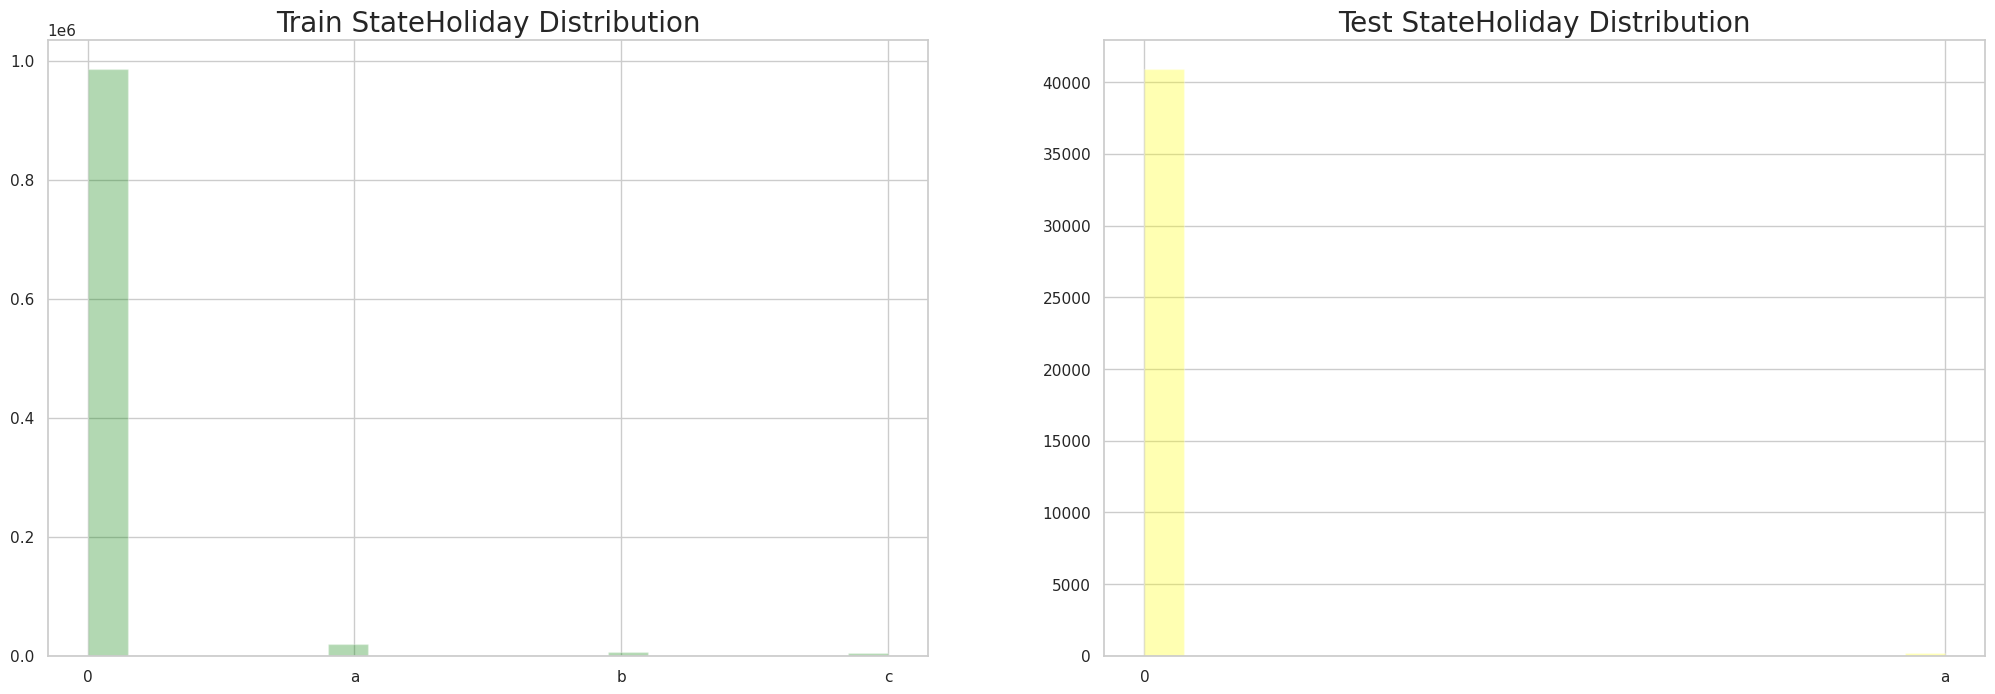

In [24]:
# Distribution of State Holidays in train and test datasets
plot.plot_subplots(df_train['StateHoliday'], df_test['StateHoliday'], 'Train StateHoliday Distribution', 'Test StateHoliday Distribution')

In [25]:
df_train.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [26]:
df_test.StateHoliday.value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

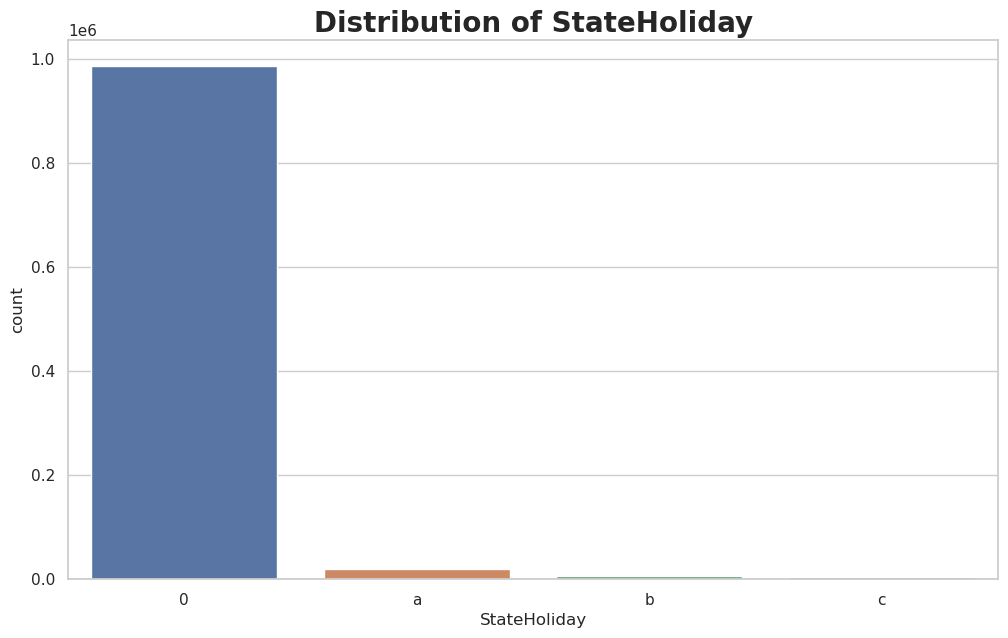

In [27]:
plot.plot_count(df=df_train,column='StateHoliday')

In [28]:
df_sales_stateholiday = df_train.groupby(['StateHoliday'])['Sales'].mean().reset_index()
df_sales_stateholiday

,StateHoliday,Sales
0,0,5947.483893
1,a,290.735686
2,b,214.311510
3,c,168.733171


In [29]:
holiday_map = {'0':  'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christams'}
df_sales_stateholiday['StateHoliday'] = df_sales_stateholiday['StateHoliday'].map(holiday_map)

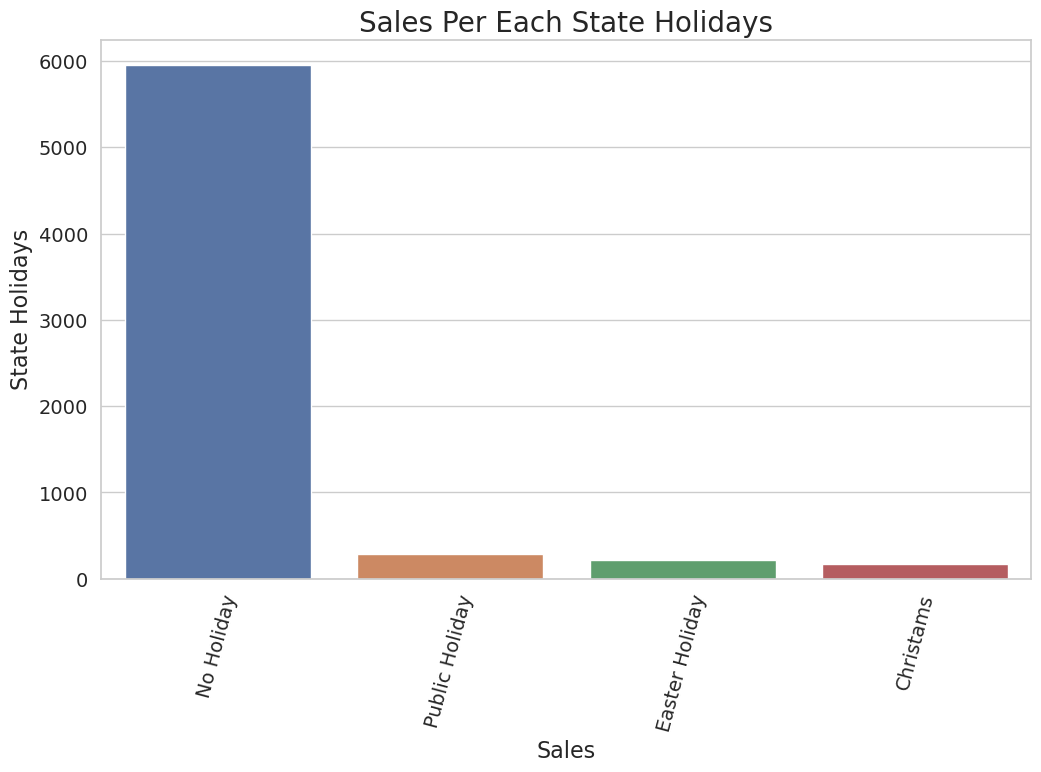

In [30]:
plot.plot_bar(df_sales_stateholiday, 'StateHoliday','Sales','Sales Per Each State Holidays','Sales','State Holidays')

### Seasonal Behaviors in Holidays (Christmas, Easter etc)

In [32]:
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month

In [41]:
df_train['Year_Month'] = df_train['Date'].apply(lambda x: (str(x)[:7]))

In [46]:
df_train['State_Holiday_count'] = df_train.StateHoliday.map({'0':0,'a':1,'b':1,'c':1})

In [63]:
df_sales_per_holidays = df_train.groupby('Year_Month').agg({'Sales': 'sum','State_Holiday_count':'sum','Id':'count'})

In [64]:
df_sales_per_holidays

,Sales,State_Holiday_count,Id
Year_Month,,,
2013-01,180132207,1423,34564
2013-02,171534275,0,31220
2013-03,201180369,1115,34565
2013-04,183431432,1115,33450
2013-05,185411063,4111,34565
2013-06,180702351,0,33450
2013-07,208843882,0,34565
2013-08,198042727,180,34565
2013-09,178053963,0,33450


In [65]:
df_sales_per_holidays_corr = df_sales_per_holidays.loc[:,['Sales','State_Holiday_count']]
df_sales_per_holidays_corr_val = df_sales_per_holidays_corr.corr()


In [66]:
df_sales_per_holidays_corr_val

,Sales,State_Holiday_count
Sales,1.000000,0.250482
State_Holiday_count,0.250482,1.000000


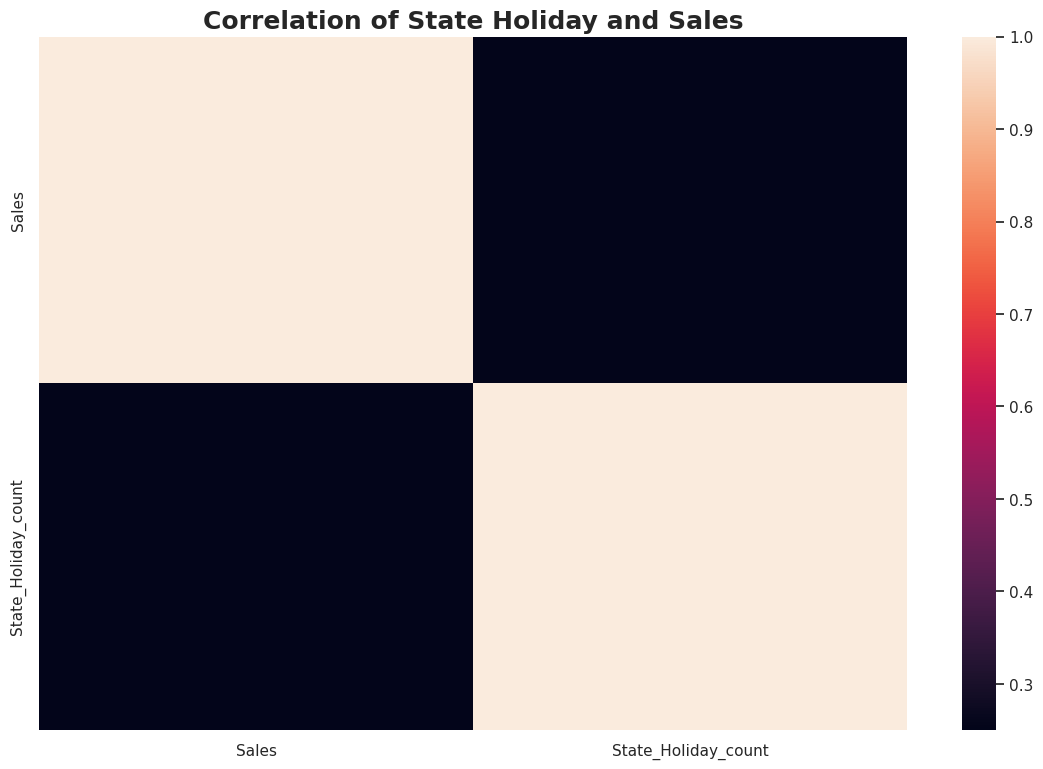

In [67]:
# This shows the holiday is not much related to the sales
plot.plot_heatmap_from_correlation(df_sales_per_holidays_corr_val,title="Correlation of State Holiday and Sales")

In [58]:
df_train[df_train['Year_Month'] == '2013-01']

,Id,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Year_Month,State_Holiday_count
911,982645,1,4,2013-01-31,4709,571,1,0,0,0,...,9.0,2008.0,0,0.0,0.0,"0,0,0,0",2013,1,2013-01,0
912,983760,1,3,2013-01-30,4601,560,1,0,0,0,...,9.0,2008.0,0,0.0,0.0,"0,0,0,0",2013,1,2013-01,0
913,984875,1,2,2013-01-29,3725,522,1,0,0,0,...,9.0,2008.0,0,0.0,0.0,"0,0,0,0",2013,1,2013-01,0
914,985990,1,1,2013-01-28,4055,549,1,0,0,0,...,9.0,2008.0,0,0.0,0.0,"0,0,0,0",2013,1,2013-01,0
915,987105,1,7,2013-01-27,0,0,0,0,0,0,...,9.0,2008.0,0,0.0,0.0,"0,0,0,0",2013,1,2013-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1012749,1115,6,2013-01-05,4771,339,1,0,0,1,...,1.0,1900.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2013-01,0
1017205,1013864,1115,5,2013-01-04,4540,326,1,0,0,1,...,1.0,1900.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2013-01,0
1017206,1014979,1115,4,2013-01-03,4297,300,1,0,0,1,...,1.0,1900.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2013-01,0
1017207,1016094,1115,3,2013-01-02,3697,305,1,0,0,1,...,1.0,1900.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,2013-01,0


### Correlation between the Sales and Number of Customers

In [69]:
df_customer_sales = df_train.loc[:,['Sales','Customers']]

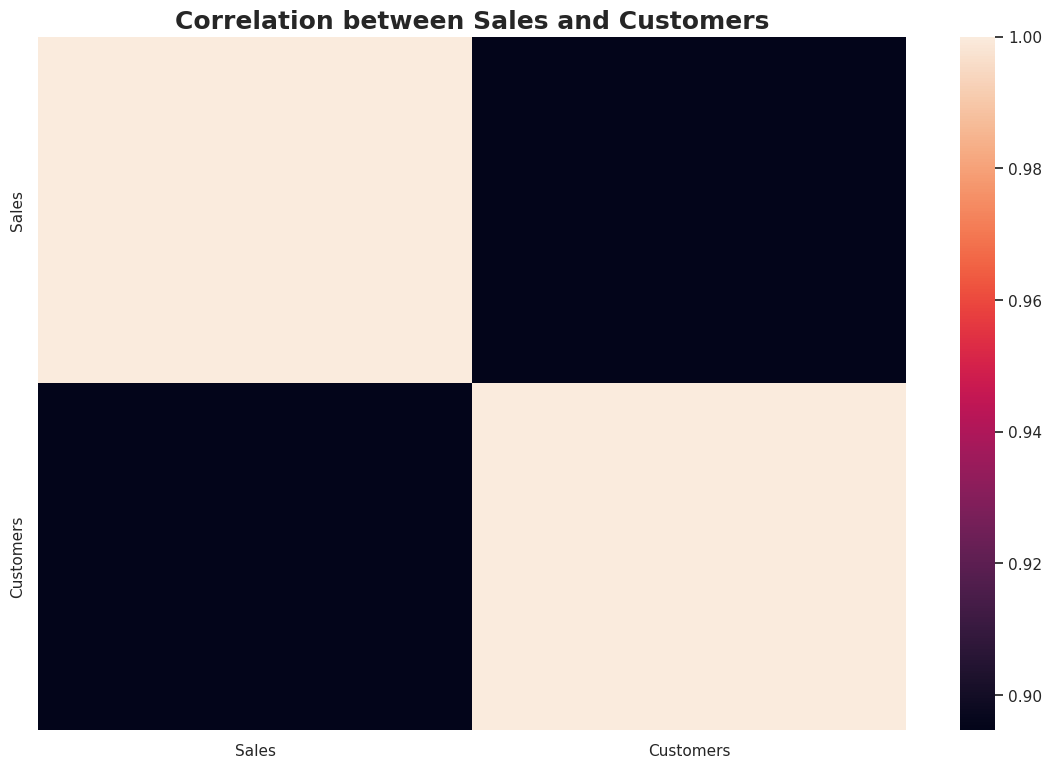

In [70]:
# the plot shows sales is highly correlated with customers
plot.plot_heatmap_from_correlation(df_customer_sales.corr(),'Correlation between Sales and Customers')

### The Effects of Promo in Sales and Customers

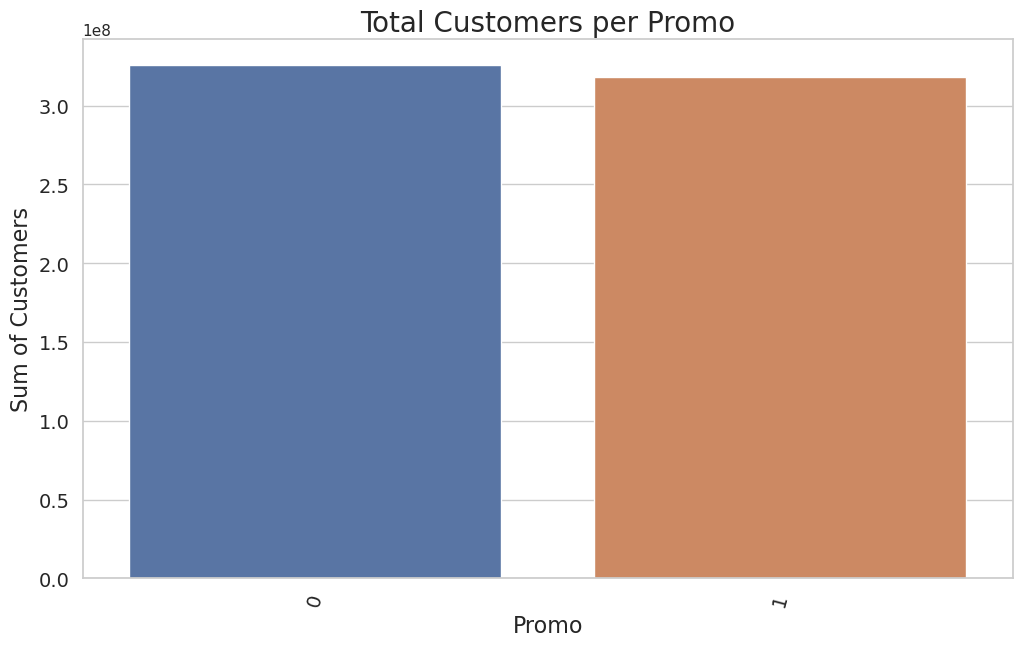

In [71]:
# Distribution of promotion per Customers
plot_comparison(df_train,'Promo','Customers')

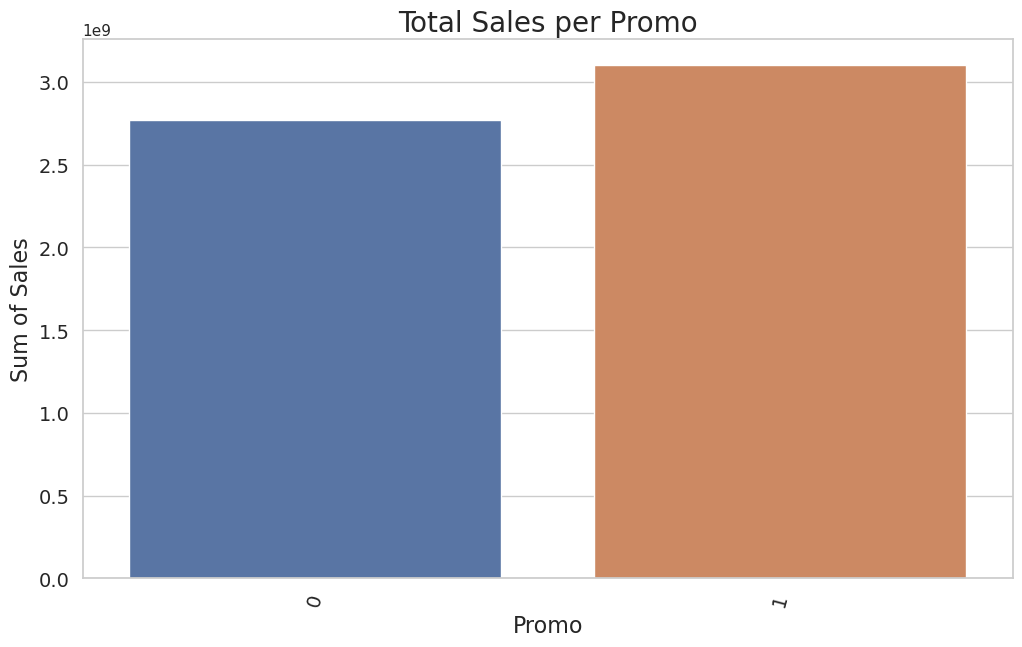

In [74]:
# Distribution of promotion per Sales
# The promotion shows larger sales
plot_comparison(df_train,'Promo','Sales')

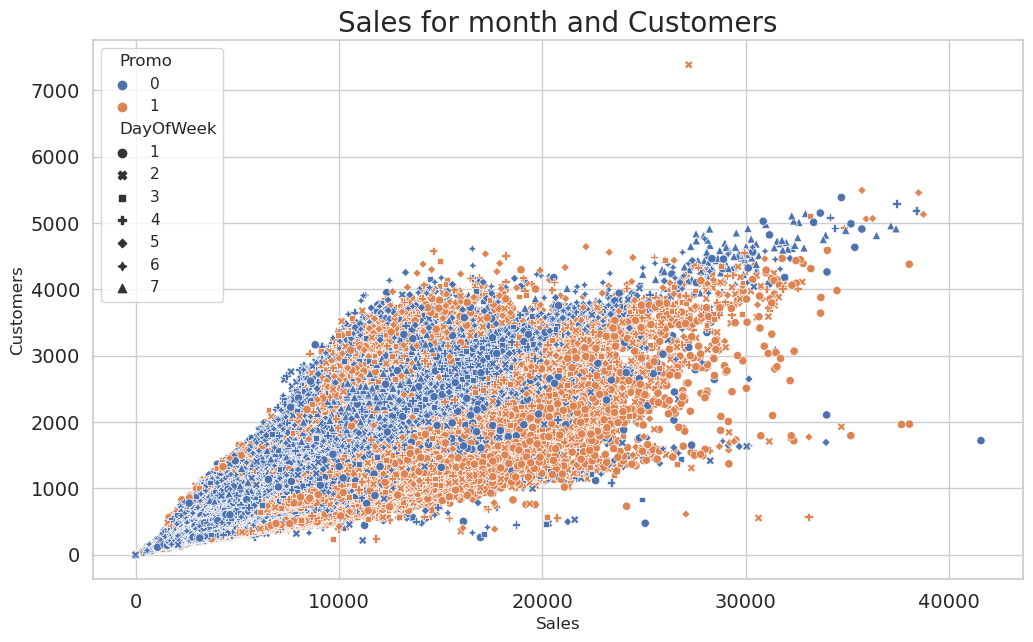

In [73]:
# the Effect of Promotion in Sales and Customer Size
# the Promoted customers show larger size of sales, so the promotion has positive impact on sales
plot.plot_scatter(df_train,'Sales','Customers','Sales for month and Customers','Promo','DayOfWeek')

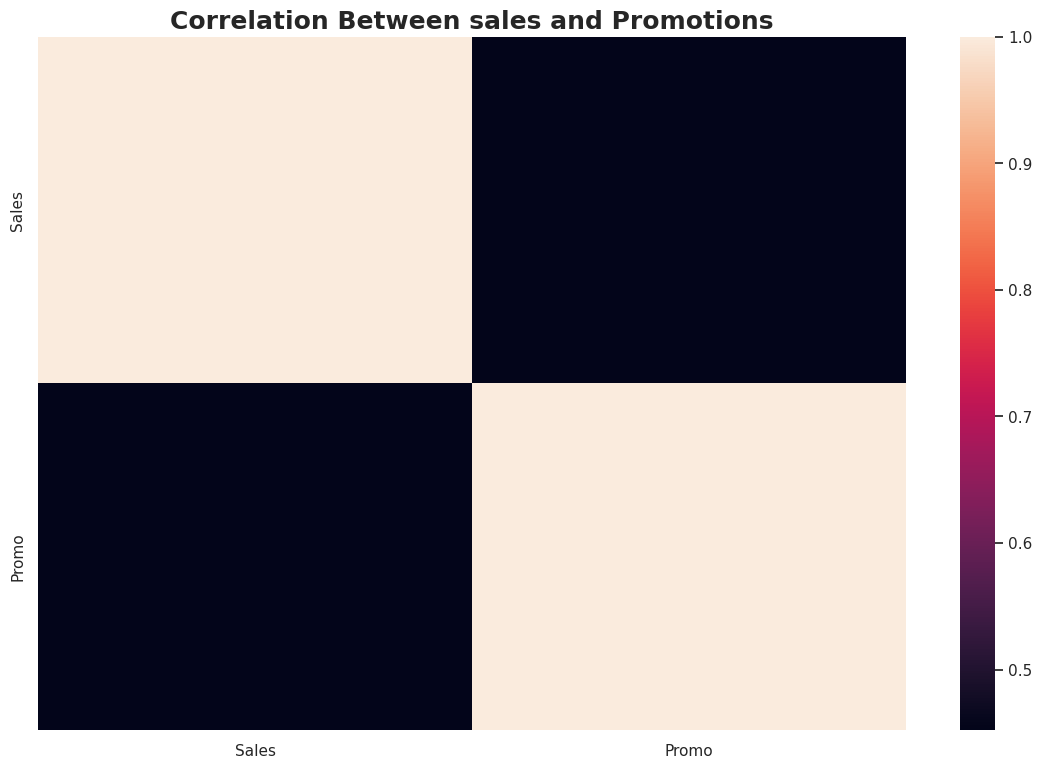

In [76]:
df_sales_promo = df_train.loc[:,['Sales','Promo']]
plot.plot_heatmap_from_correlation(df_sales_promo.corr(), 'Correlation Between sales and Promotions')


### Could the promos be deployed in more effective ways? Which stores should promos be deployed in

In [83]:
df_store_type = df_train.groupby('StoreType')['Sales'].sum().reset_index()

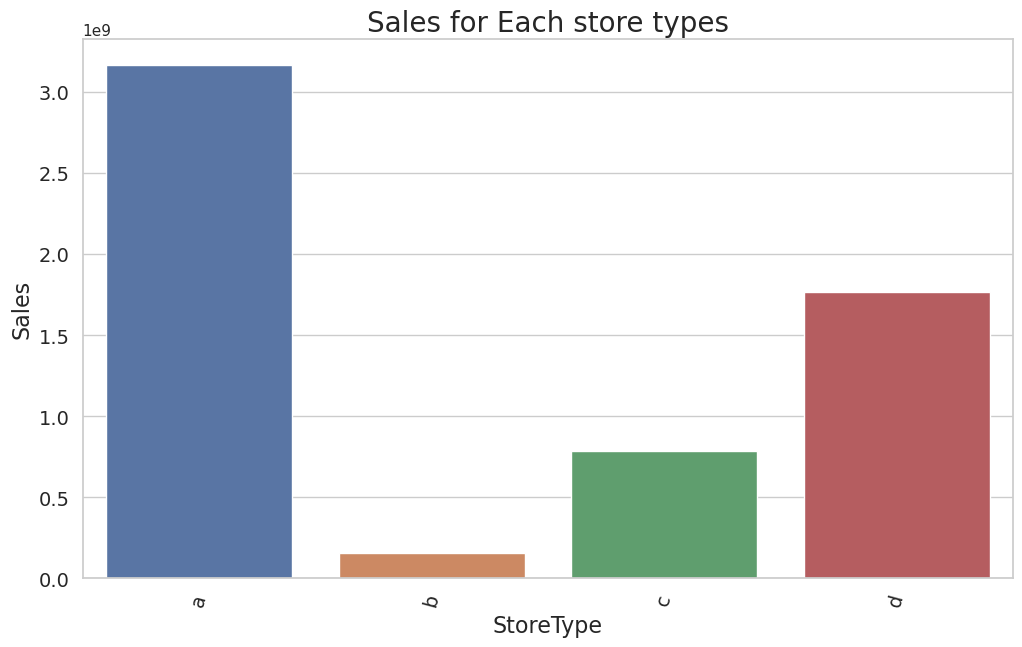

In [87]:
plot.plot_bar(df_store_type,'StoreType','Sales','Sales for Each store types', xlabel='StoreType',ylabel='Sales')

In [85]:
df_unpromoted = df_train[df_train.Promo==0]
df_promoted = df_train[df_train.Promo==1]

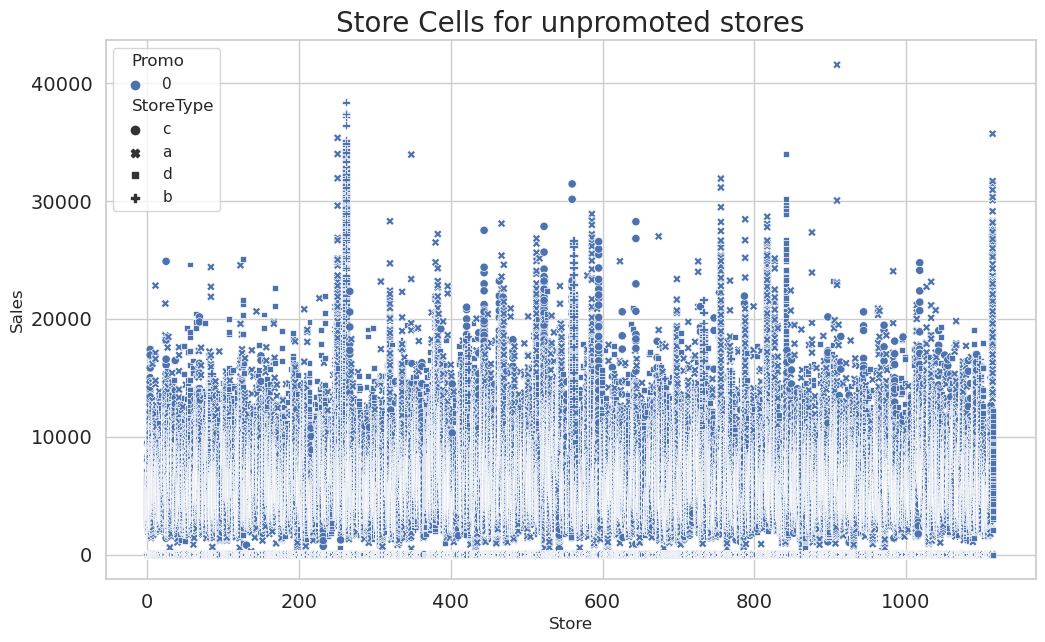

In [91]:
plot.plot_scatter(df_unpromoted, 'Store','Sales', 'Store Cells for unpromoted stores', 'Promo', 'StoreType')

/home/owon/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


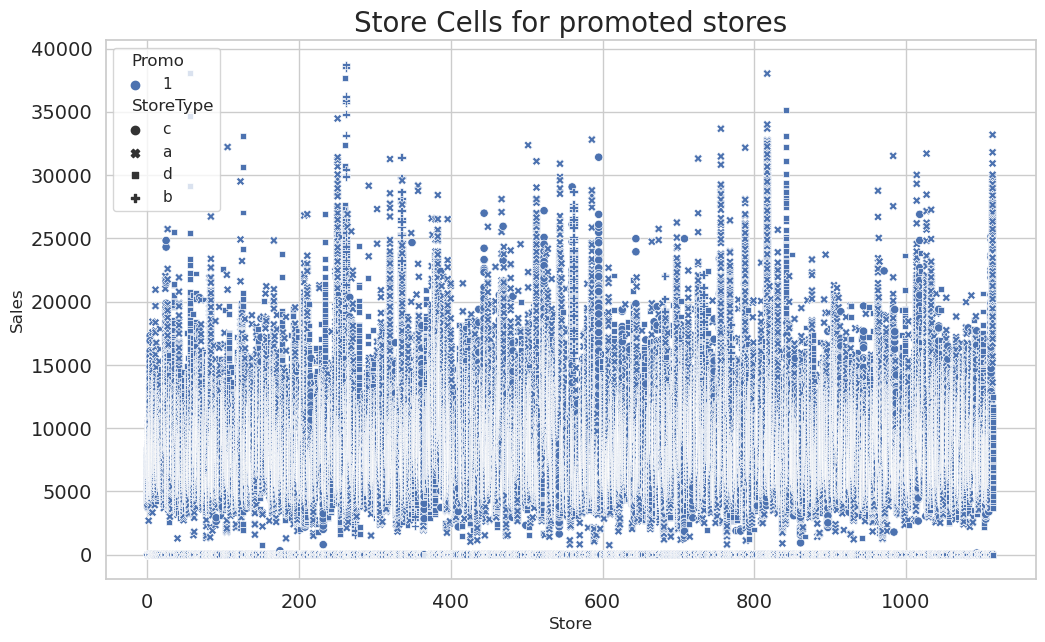

In [92]:
# We can see that the promoted stores has a vertically shifted sales graph
# which indicates the promotion has resulted in an increase
plot.plot_scatter(df_promoted, 'Store','Sales', 'Store Cells for promoted stores', 'Promo', 'StoreType')

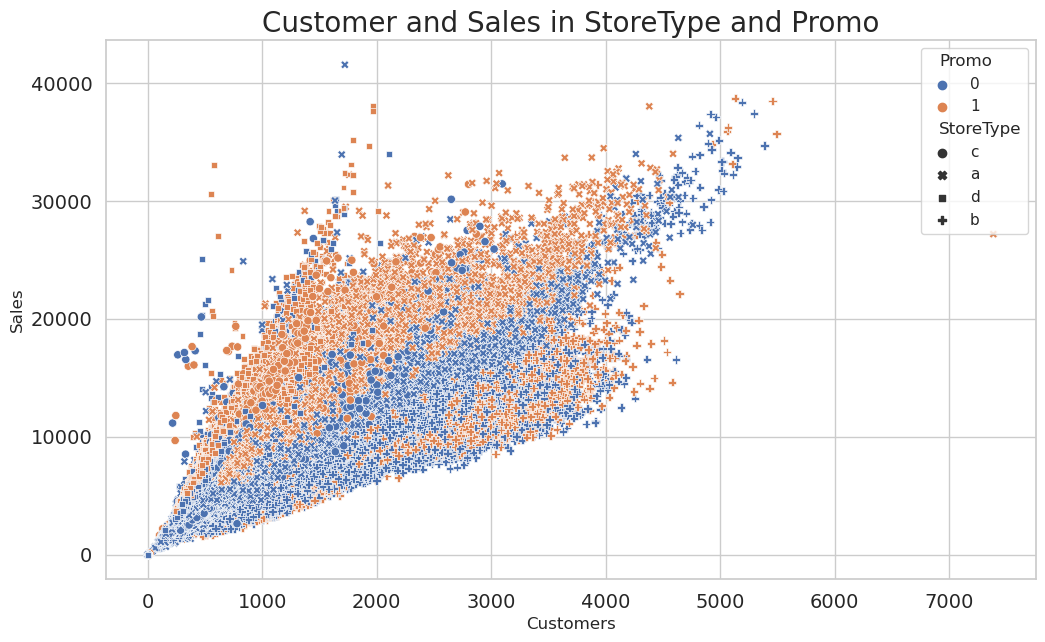

In [93]:
plot.plot_scatter(df_train, 'Customers','Sales', 'Customer and Sales in StoreType and Promo', 'Promo', 'StoreType')

### Trends of customer behavior during store open and closing times

In [94]:
# There is no customer and sales when the store is closed, which is logical 
customer_behaviour = df_train.groupby('Open').agg({'Customers':'mean','Sales':'mean'})
customer_behaviour

,Customers,Sales
Open,,
0,0.000000,0.000000
1,762.728395,6955.514291


### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [105]:
# only 3593 stores are open in sunday
df_train[(df_train.DayOfWeek==7)].Open.value_counts()

0    141137
1      3593
Name: Open, dtype: int64

In [106]:
# only 672 stores are closed in saturday
df_train[(df_train.DayOfWeek==6)].Open.value_counts()

1    144058
0       672
Name: Open, dtype: int64

In [108]:
# assuming the stores who open in sundays are open always
df_open_always = df_train[df_train.DayOfWeek==7]

In [110]:
df_open_always = df_open_always[df_open_always.Open==1]

In [111]:
df_open_always.shape

(3593, 23)

In [119]:
open_stores = df_open_always.Store.unique()

In [127]:
df_open_stores = df_train.loc[df_train.Store.isin(open_stores)]

In [128]:
data_always = df_open_stores.groupby(['DayOfWeek']).agg({'Sales':'sum','Open':sum}).reset_index()

In [129]:
data_always

,DayOfWeek,Sales,Open
0,1,41302101,4353
1,2,37512360,4373
2,3,36381981,4341
3,4,36655455,4322
4,5,38226031,4312
5,6,30597536,4359
6,7,29551433,3593


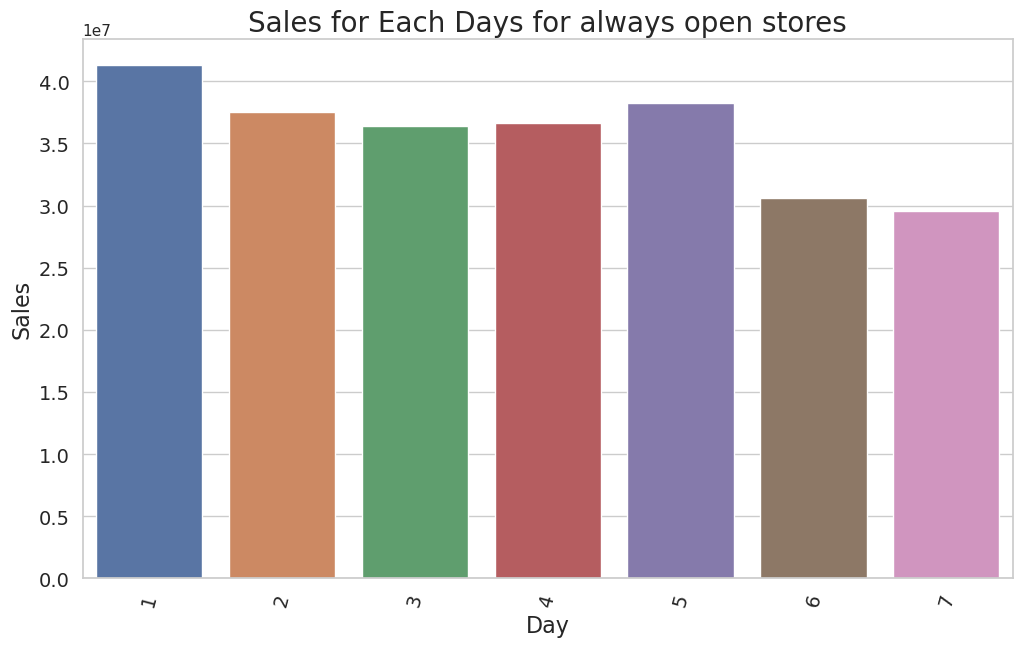

In [140]:
# The sale in Sunday seems to be the lowest but the variation is worth noticing
plot.plot_bar(data,'DayOfWeek','Sales','Sales for Each Days for always open stores', xlabel='Day',ylabel='Sales')

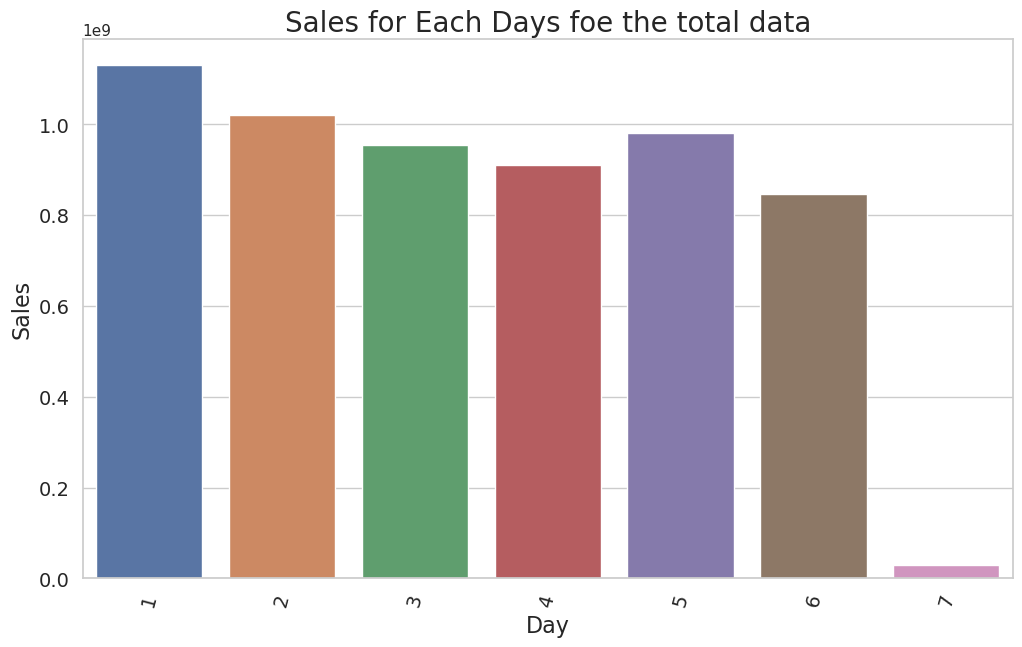

In [139]:
# this graph shows the sale for sunday is low because most stores are closed. but as shown in the above 
# the stores which are open have relatively the same sale as the others, so stores should be open always
data_all = df_train.groupby(['DayOfWeek']).agg({'Sales':'sum','Open':sum}).reset_index()
plot.plot_bar(data_all,'DayOfWeek','Sales','Sales for Each Days foe the total data', xlabel='Day',ylabel='Sales')

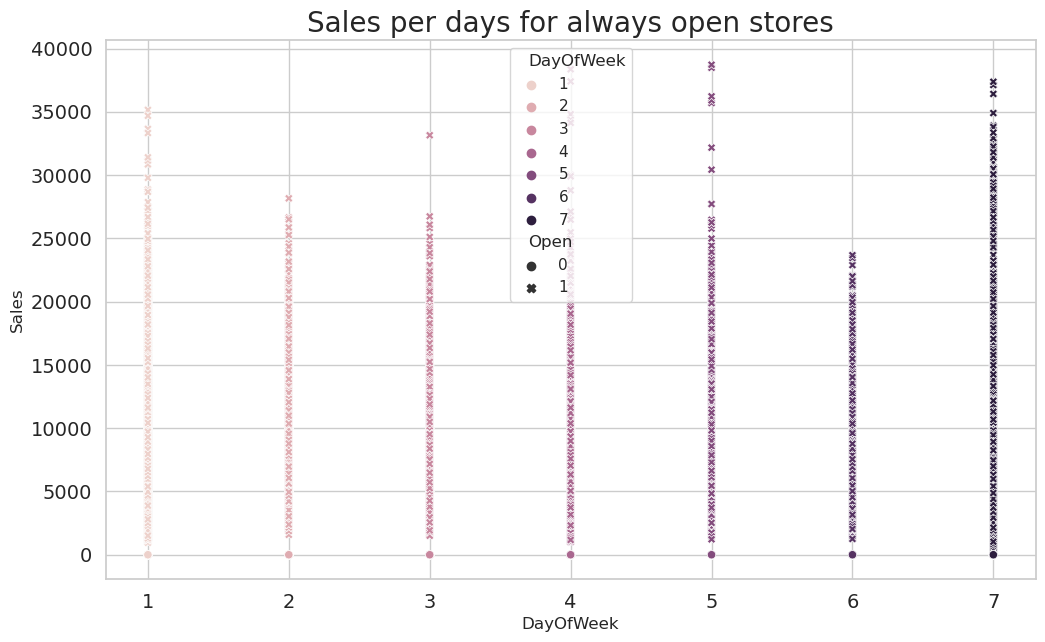

In [134]:

plot.plot_scatter(df_open_stores,'DayOfWeek','Sales','Sales per days for always open stores','DayOfWeek','Open')

### Check how the assortment type affects sales

<AxesSubplot:xlabel='Assortment', ylabel='Customers'>

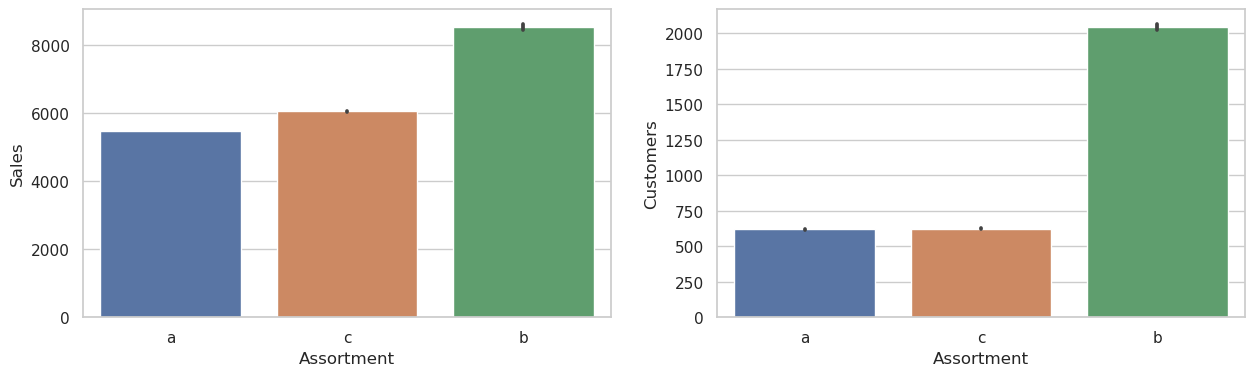

In [141]:
## assortment type b has the highest sales and customers size
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df_train, ax=axis1)
sns.barplot(x='Assortment', y='Customers', data=df_train,  ax=axis2)

### Correlation Analysis


/tmp/ipykernel_58279/2758459992.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_all, dtype = np.bool)


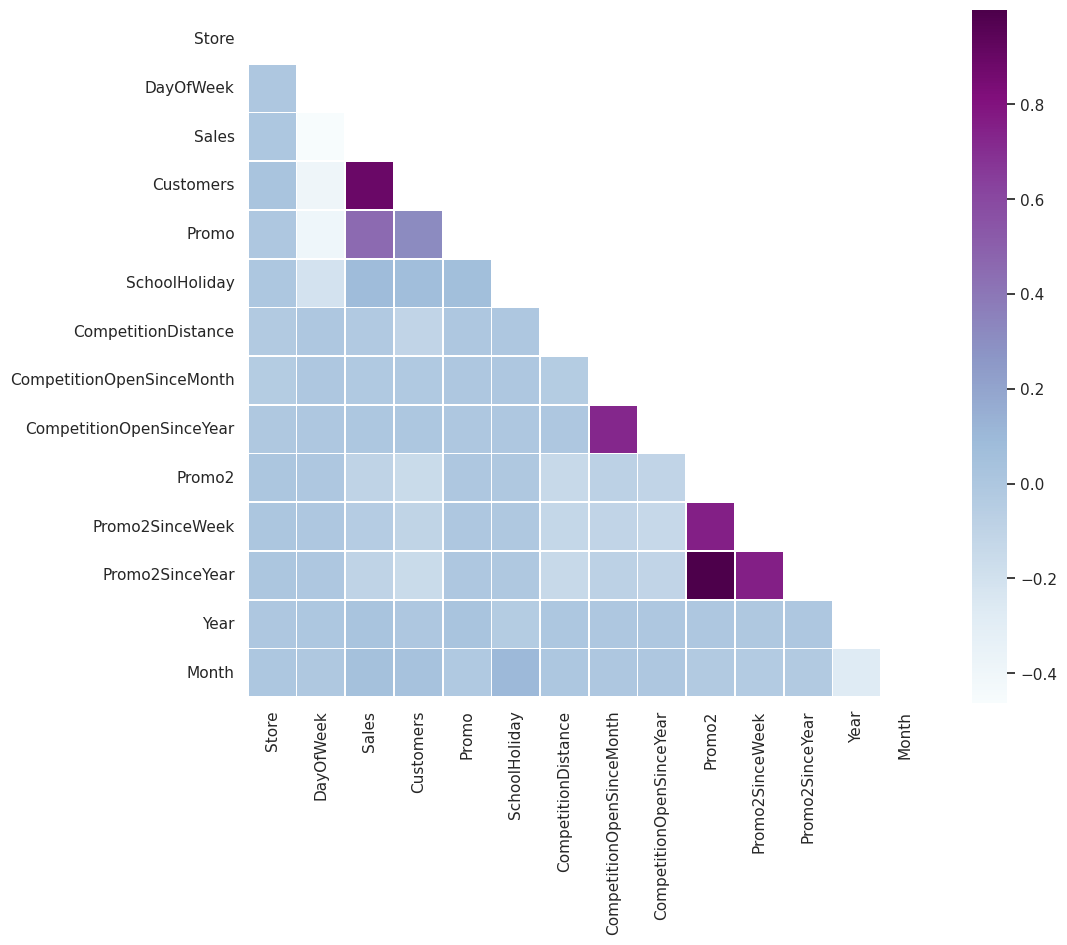

In [148]:
# Compute the correlation matrix 
corr_all = df_train.drop(columns=['Open','Id','State_Holiday_count','Date'], axis = 1).corr()
# upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")      
plt.show()